# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Roberto Franco </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [32]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy import stats

In [33]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [34]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [53]:
df['Hemisferio'] = ""
hemisferio =[]
for i in range(len(df)):
    if df.Latitude[i] <0:
        hemisferio.append("Sul")
    if df.Latitude[i] > 0:
        hemisferio.append("Norte")
        
df['Hemisferio'] = pd.Series(hemisferio)
pd.DataFrame(df.Hemisferio)
# separando relevantes:



Sul      12794
Norte    10617
Name: Hemisferio, dtype: int64

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

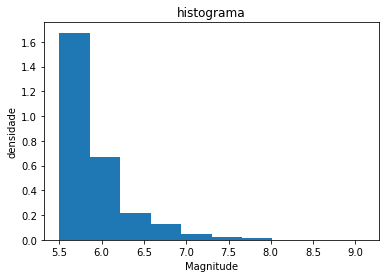

In [36]:
plot = df.Magnitude.plot.hist(title= 'histograma', normed = 1)
plt.ylabel("densidade")
plt.xlabel("Magnitude")

### Interpretacao 

o histograma mostra que entre as magnitudes existentes, as que ocorrem com mais frequencia estão entre 5.5 e 6.0

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [37]:
fit = expon.fit(df.Magnitude)
# loc-sigma

mu = fit[0]
sigma = fit[1]

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

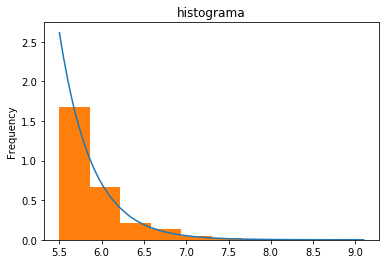

In [38]:
plt.plot(sorted(df["Magnitude"]), stats.expon.pdf(sorted(df["Magnitude"]), loc=mu, scale = sigma))
plot = df.Magnitude.plot.hist(title= 'histograma', normed = 1)

### interpretação

completar

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [39]:
tab = pd.crosstab(df.Hemisferio, df.Type, normalize = True)*100
tab

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisferio,,,,
Norte,44.906241,0.012814,0.427150,0.004271
Sul,54.324890,0.004271,0.320362,0.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [40]:
terremoto_norte = len(df.loc[(df['Hemisferio'] == 'Norte')&(df['Type'] == 'Earthquake')])
terremoto_total = len(df.loc[df['Type'] == 'Earthquake'])
prob_terremoto_norte = terremoto_norte/terremoto_total
prob_terremoto_norte

0.4525223829201102

Explique o seu raciocínio

p(terremoto/norte) = p(H.N ∩ com terremoto )/ p(terremoto)

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [41]:
r = df.groupby('Hemisferio').size().div(len(df))
df.groupby(["Type", "Hemisferio"]).size().div(len(df)).div(r,axis = 0, level = "Hemisferio")


#soma = []

#for i in range(4):
#    soma.append(tab.iloc[0,i])
#P_total = np.sum(soma)
#P_nuclear = tab.iloc[0,2]
#P_norte = P_nuclear/P_total
#print(P_norte)

    
    
    

Type               Hemisferio
Earthquake         Norte         0.990204
                   Sul           0.994060
Explosion          Norte         0.000283
                   Sul           0.000078
Nuclear Explosion  Norte         0.009419
                   Sul           0.005862
Rock Burst         Norte         0.000094
dtype: float64

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

em norte: 0.009419

p(N.E/norte) = p(N.E ∩ norte )/ p(norte)

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

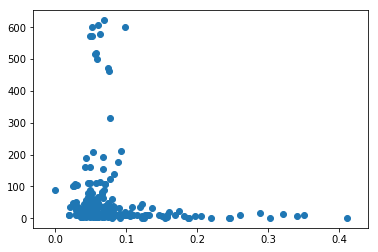

In [42]:
scatter = plt.scatter(df["Magnitude Error"], df ['Depth'])


Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [43]:
df['Magnitude Error'].corr(df['Depth'])

-0.076918438923387206

Explique o que significa o valor da correlação calculada acima? 

A covariância normalizada, ou seja, a correlação, é uma medida que indica o quanto duas variáveis estão relacionadas. Seu valor fica sempre entre -1, que indica uma anti-correlação perfeita, e 1, que indica uma correlação perfeita. No caso, como está proximo de zero, quase não há correlação.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

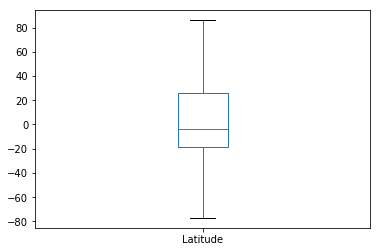

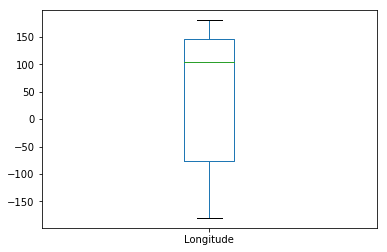

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64
count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64


In [44]:

df.Latitude.plot(kind ="box")
plt.show()
df.Longitude.plot(kind ="box")
plt.show()

print (df["Latitude"].describe())


print (df["Longitude"].describe())

### interpretação

Através do describe percebe-se que a maioria dos tremores (50%) estao abaixo do equador, e proximos às Americas.


50% latitude: +/- -3.5

50% longitude: +/- 104



## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes

 - P(N|MB ∩ NE ) = P((MB ∩ NE) ∩ N )/P(MB ∩ NE)

 - P(S| MB ∩ NE) = P((MB ∩ NE) ∩ S )/P(MB ∩ NE)



In [54]:
df_6 = df[(df['Magnitude Type'] == 'MB')&(df['Type'] == 'Nuclear Explosion')]

df_6.Hemisferio.value_counts(True)

Norte    0.552147
Sul      0.447853
Name: Hemisferio, dtype: float64

A probabilidade de ter uma nuclear explosion no norte é: 0.55 e no sul é: 0.44, logo o norte tem uma probabilidade maior de ocorrer uma nuclear explosion.